In [19]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None) #Tells pandas to display all columns when printing a DataFrame.
sns.set(style="whitegrid")     #Configures Seaborn’s aesthetic style for subsequent plots.
                               # "whitegrid" gives a white background with faint gridlines (helpful for reading values).


In [20]:
# Step 2: Load dataset
file_path = "/content/student_dropout_dataset.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape) #no.of rows and columns
print("\nFirst 5 rows:")
print(df.head()) #first 5 rows we are printing


Dataset Shape: (2000, 16)

First 5 rows:
  Student_ID      Student_name  Age  Gender  Grade           School  \
0      S0783      Ishaan Singh   15    male      9    private aided   
1      S0514  Siddharth Sharma   15  female      9  private unaided   
2      S0068       Sonal Kumar   14  female      8  private unaided   
3      S0775       Aarav Reddy   14    male      8       government   
4      S1948       Divya Kumar   15    male      9    private aided   

  SocialCategory   Area  Attendance_percentage SocialEconomic status  \
0            OBC  urban                   89.4                Medium   
1        general  rural                   97.2                   Low   
2            OBC  urban                   74.7                  High   
3             SC  urban                   81.5                Medium   
4             SC  urban                   60.9                Medium   

   distance_to_school previous_year_result scholarship_status  dropout_score  \
0                0.

In [21]:
# Step 3: Initial inspection
print("\nColumn Info:")
print(df.info()) # no.of entries starting from 0 and column names and its data type.

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDropout flag distribution:")
print(df['dropout'].value_counts())



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             2000 non-null   object 
 1   Student_name           2000 non-null   object 
 2   Age                    2000 non-null   int64  
 3   Gender                 2000 non-null   object 
 4   Grade                  2000 non-null   int64  
 5   School                 2000 non-null   object 
 6   SocialCategory         2000 non-null   object 
 7   Area                   2000 non-null   object 
 8   Attendance_percentage  2000 non-null   float64
 9   SocialEconomic status  2000 non-null   object 
 10  distance_to_school     2000 non-null   float64
 11  previous_year_result   2000 non-null   object 
 12  scholarship_status     2000 non-null   object 
 13  dropout_score          2000 non-null   float64
 14  dropout                2000 non-null   obj

In [22]:
# Step 4: Data Preprocessing

# Create target variable
df["is_dropout"] = df["dropout"].map({"Yes": 1, "No": 0})

# Drop unnecessary columns (like ID, Name, free text reason)
df = df.drop(columns=["Student_ID", "Student_name", "dropout", "DropoutReason"])

# Handle missing values (if any)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown") #replaces NaN values with the string "Unknown"
    else:
        df[col] = df[col].fillna(df[col].median()) #replaces missing numeric values with the column median.

# Convert categorical variables into dummy/one-hot encoding
categorical_cols = df.select_dtypes(include="object").columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Processed dataset shape:", df_encoded.shape)
print(df_encoded.head())

Processed dataset shape: (2000, 17)
   Age  Grade  Attendance_percentage  distance_to_school  dropout_score  \
0   15      9                   89.4                0.15      10.217833   
1   15      9                   97.2                8.44      21.308489   
2   14      8                   74.7                0.06      13.488960   
3   14      8                   81.5                2.20      15.668872   
4   15      9                   60.9                0.11      13.782415   

   is_dropout  Gender_male  School_private aided  School_private unaided  \
0         NaN         True                  True                   False   
1         NaN        False                 False                    True   
2         NaN        False                 False                    True   
3         NaN         True                 False                   False   
4         NaN         True                  True                   False   

   SocialCategory_SC  SocialCategory_ST  SocialCategory_

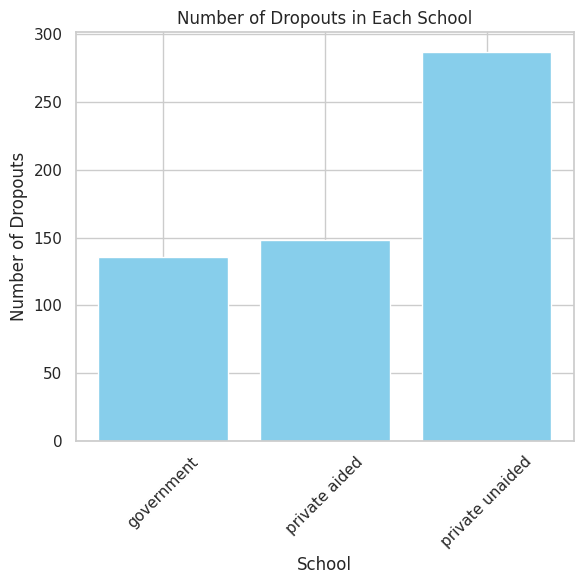

In [23]:
# School-wise using Statistical Aggregation
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('student_dropout_dataset.csv')

# Group by 'School' and count dropouts (assuming 'dropout' column with 'yes'/'no')
dropout_counts = data.groupby('School')['dropout'].apply(lambda x: (x == 'yes').sum()).reset_index()
dropout_counts.columns = ['School', 'Dropout Count']

# Plotting the bar chart
plt.figure(figsize=(6, 6))
plt.bar(dropout_counts['School'], dropout_counts['Dropout Count'], color='skyblue')
plt.xlabel('School')
plt.ylabel('Number of Dropouts')
plt.title('Number of Dropouts in Each School')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Gender  Dropout Count
0  female            296
1    male            275


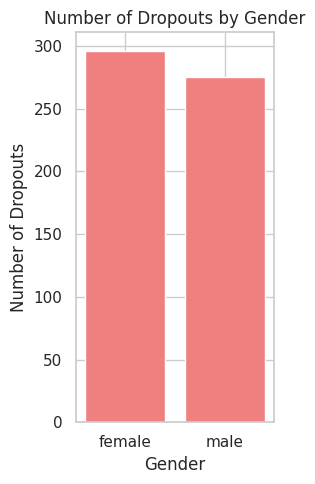

In [24]:
#Gender-wise using Statistical aggregation
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('student_dropout_dataset.csv')

# Group by 'Gender' and count dropouts ('dropout' column contains 'yes'/'no')
dropout_gender_counts = data.groupby('Gender')['dropout'].apply(lambda x: (x == 'yes').sum()).reset_index()
dropout_gender_counts.columns = ['Gender', 'Dropout Count']

# Print dropout counts by gender
print(dropout_gender_counts)

# Plotting the bar chart
plt.figure(figsize=(3, 5))
plt.bar(dropout_gender_counts['Gender'], dropout_gender_counts['Dropout Count'], color='lightcoral')
plt.xlabel('Gender')
plt.ylabel('Number of Dropouts')
plt.title('Number of Dropouts by Gender')
plt.tight_layout()
plt.show()


    Area  Dropout Count
0  rural            314
1  urban            257


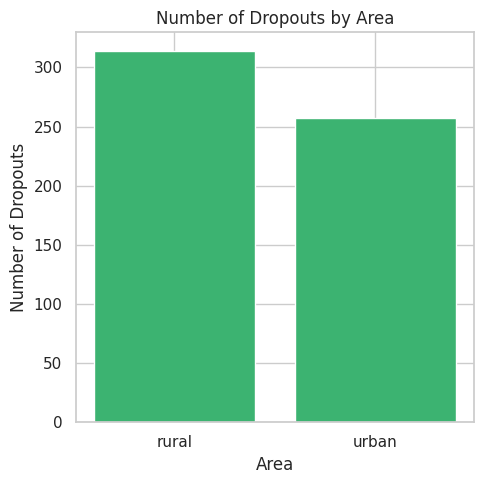

In [35]:
#Area wise using Statistical Aggregation
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('student_dropout_dataset.csv')

# Group by 'Area' and count dropouts ('dropout' column contains 'yes'/'no')
dropout_area_counts = data.groupby('Area')['dropout'].apply(lambda x: (x == 'yes').sum()).reset_index()
dropout_area_counts.columns = ['Area', 'Dropout Count']

# Print dropout counts by area
print(dropout_area_counts)

# Plotting the bar chart
plt.figure(figsize=(5, 5))
plt.bar(dropout_area_counts['Area'], dropout_area_counts['Dropout Count'], color='mediumseagreen')
plt.xlabel('Area')
plt.ylabel('Number of Dropouts')
plt.title('Number of Dropouts by Area')
plt.tight_layout()
plt.show()


   Grade  Dropout Count
0      8            146
1      9            259
2     10            166


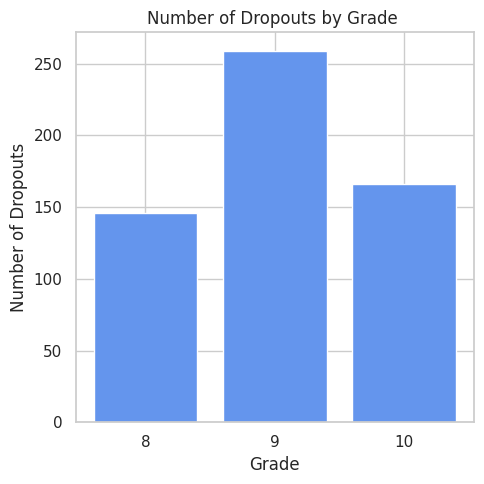

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('student_dropout_dataset.csv')

# Filter data for grades
filtered_data = data[data['Grade'].isin([8, 9, 10])]

# Group by 'Grade' and count dropouts (dropout column with 'yes'/'no')
dropout_grade_counts = filtered_data.groupby('Grade')['dropout'].apply(lambda x: (x == 'yes').sum()).reset_index()
dropout_grade_counts.columns = ['Grade', 'Dropout Count']

# Print dropout counts
print(dropout_grade_counts)

# Plotting bar chart
plt.figure(figsize=(5, 5))
plt.bar(dropout_grade_counts['Grade'].astype(str), dropout_grade_counts['Dropout Count'], color='cornflowerblue')
plt.xlabel('Grade')
plt.ylabel('Number of Dropouts')
plt.title('Number of Dropouts by Grade ')
plt.tight_layout()
plt.show()


  SocialCategory  Dropout Count
0            OBC            256
1             SC            105
2             ST             60
3        general            150


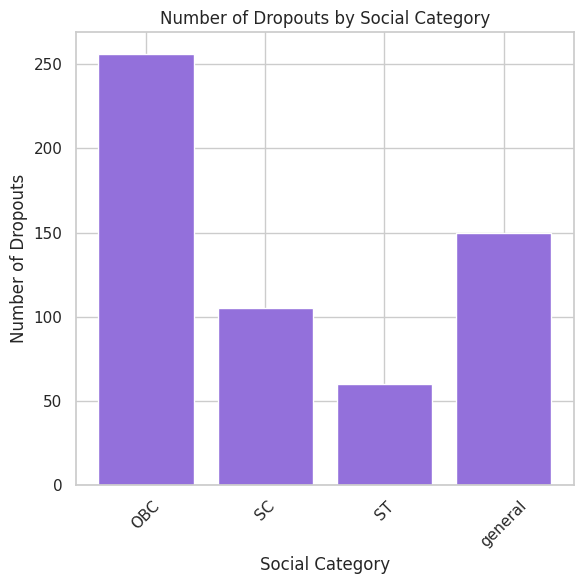

In [27]:
#Category-wise using Statistical Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('student_dropout_dataset.csv')

# Group by 'SocialCategory' and count dropouts ('dropout' column with 'yes'/'no')
dropout_category_counts = data.groupby('SocialCategory')['dropout'].apply(lambda x: (x == 'yes').sum()).reset_index()
dropout_category_counts.columns = ['SocialCategory', 'Dropout Count']

# Print dropout counts by social category
print(dropout_category_counts)

# Plotting the bar chart
plt.figure(figsize=(6, 6))
plt.bar(dropout_category_counts['SocialCategory'], dropout_category_counts['Dropout Count'], color='mediumpurple')
plt.xlabel('Social Category')
plt.ylabel('Number of Dropouts')
plt.title('Number of Dropouts by Social Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = '/content/student_dropout_dataset.csv'
df = pd.read_csv(file_path)

# Drop identifying and leakage-prone features
features_to_drop = ['Student_ID', 'Student_name', 'DropoutReason', 'dropout_score']
df = df.drop(features_to_drop, axis=1, errors='ignore')

# Encode categorical columns (including target)
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
dropout_target = 'dropout'
X = df.drop([dropout_target], axis=1)
y = df[dropout_target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 93.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       286
           1       0.95      0.81      0.87       114

    accuracy                           0.93       400
   macro avg       0.94      0.89      0.91       400
weighted avg       0.93      0.93      0.93       400

Confusion Matrix:
[[281   5]
 [ 22  92]]


Predicted dropout counts by school:
School
private unaided    271
private aided      148
government         135
dtype: int64


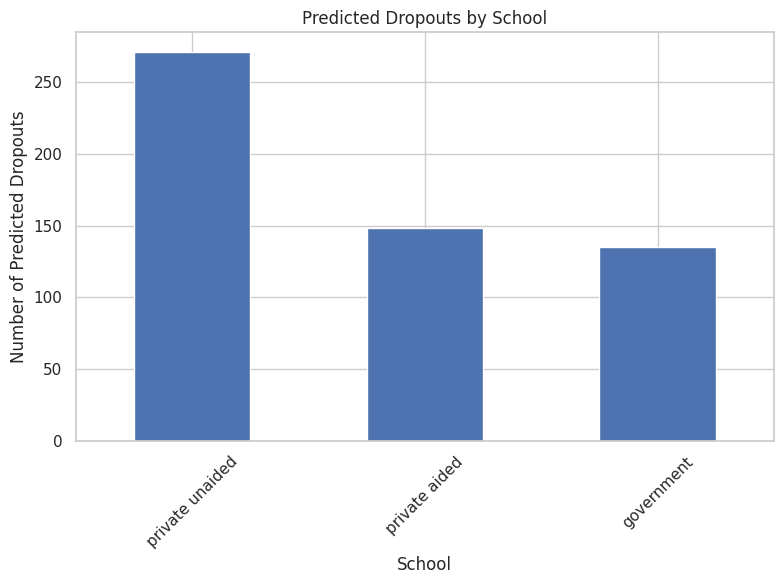

In [29]:
#Schoool-wise using Random Forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('student_dropout_dataset.csv')

# Drop identifying and leakage-prone columns
df_clean = df.drop(['Student_ID', 'Student_name', 'DropoutReason', 'dropout_score'], axis=1, errors='ignore')

# Encode categorical variables
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Define features and target
target = 'dropout'
X = df_clean.drop(target, axis=1)
y = df_clean[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on full dataset
y_pred = rf.predict(X)

# Add predictions to original data
result_df = df.copy()
result_df['predicted_dropout'] = y_pred

# Group predicted dropouts by school
school_dropout_counts = result_df[result_df['predicted_dropout'] == 1].groupby('School').size().sort_values(ascending=False)

# Print counts
print("Predicted dropout counts by school:")
print(school_dropout_counts)

# Plot bar graph
plt.figure(figsize=(8,6))
school_dropout_counts.plot(kind='bar')
plt.title('Predicted Dropouts by School')
plt.xlabel('School')
plt.ylabel('Number of Predicted Dropouts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Predicted dropout counts by Grade:
Gender
female    288
male      266
dtype: int64


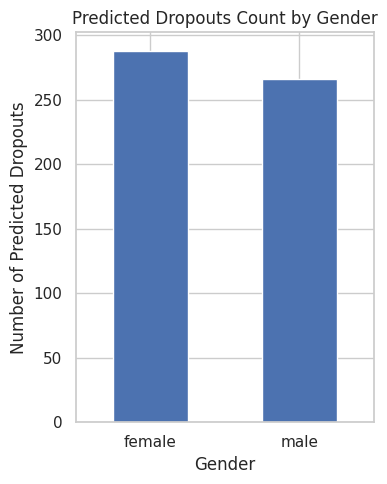

In [30]:
#Gender-wise using Random Forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('student_dropout_dataset.csv')

# Drop identifying and leakage-prone columns
df_clean = df.drop(['Student_ID', 'Student_name', 'DropoutReason', 'dropout_score'], axis=1, errors='ignore')

# Encode categorical columns including gender and target
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Define features and target
target = 'dropout'
X = df_clean.drop(target, axis=1)
y = df_clean[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict for the entire dataset
y_pred = rf.predict(X)

# Add predictions to original dataframe
result_df = df.copy()
result_df['predicted_dropout'] = y_pred

# Gender-wise predicted dropouts count
genderwise_dropout_counts = result_df[result_df['predicted_dropout'] == 1].groupby('Gender').size().sort_values(ascending=False)

# Print counts
print("Predicted dropout counts by Grade:")
print(genderwise_dropout_counts)

# Plot bar graph
plt.figure(figsize=(4,5))
genderwise_dropout_counts.plot(kind='bar')
plt.title('Predicted Dropouts Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Predicted Dropouts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Predicted dropout counts by grade:
Grade
9     244
10    162
8     148
dtype: int64


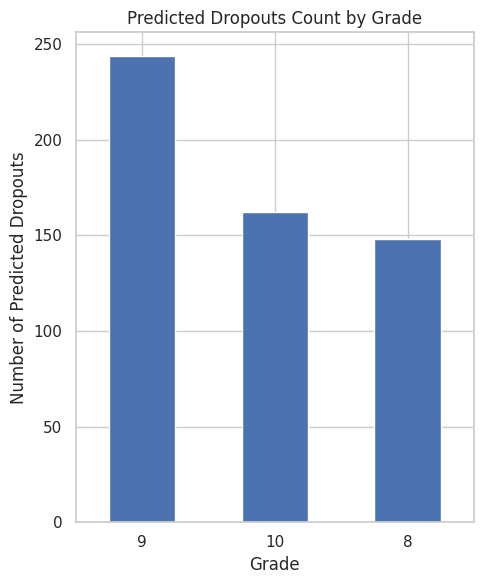

In [31]:
#Grade-wise Using Random Forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('student_dropout_dataset.csv')

# Drop identifying and leakage-prone columns
df_clean = df.drop(['Student_ID', 'Student_name', 'DropoutReason', 'dropout_score'], axis=1, errors='ignore')

# Encode categorical features
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Define features and target
target = 'dropout'
X = df_clean.drop(target, axis=1)
y = df_clean[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions for entire data
y_pred = rf.predict(X)

# Add predicted dropout back to original data
result_df = df.copy()
result_df['predicted_dropout'] = y_pred

# Group predicted dropouts by grade
grade_dropout_counts = result_df[result_df['predicted_dropout'] == 1].groupby('Grade').size().sort_values(ascending=False)

# Print the dropout counts grade-wise
print("Predicted dropout counts by grade:")
print(grade_dropout_counts)

# Plot bar chart for grade-wise predicted dropouts
plt.figure(figsize=(5,6))
grade_dropout_counts.plot(kind='bar')
plt.title('Predicted Dropouts Count by Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Predicted Dropouts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Predicted dropouts count by social category:
SocialCategory
OBC        248
general    145
SC         103
ST          58
dtype: int64


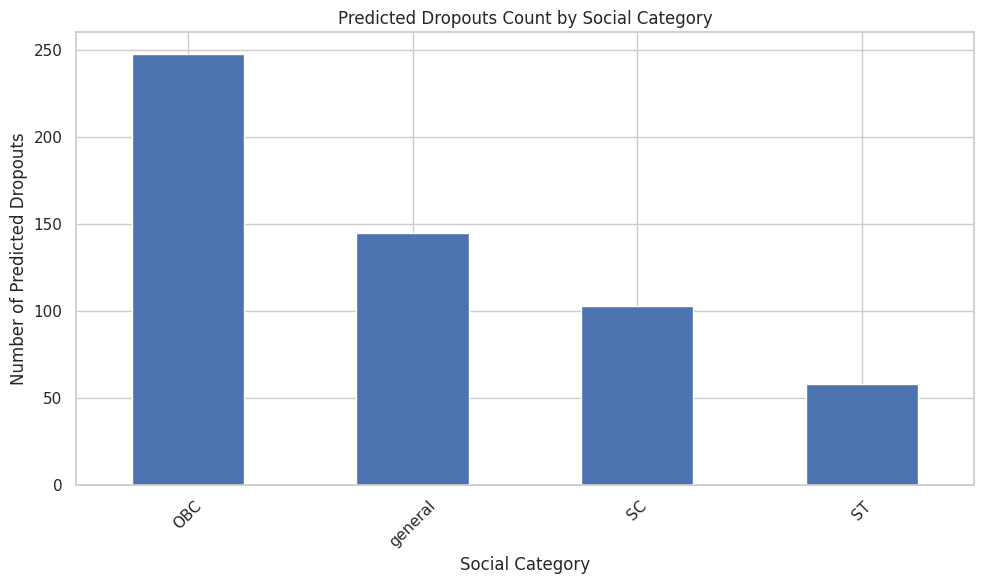

In [32]:
#Category-wise using Random Forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('student_dropout_dataset.csv')

# Drop identifier and leakage-prone columns
df_clean = df.drop(['Student_ID', 'Student_name', 'DropoutReason', 'dropout_score'], axis=1, errors='ignore')

# Encode categorical columns
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Define features and target
target = 'dropout'
X = df_clean.drop(target, axis=1)
y = df_clean[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on full dataset
y_pred = rf.predict(X)

# Add predictions to original dataframe
result_df = df.copy()
result_df['predicted_dropout'] = y_pred

# Group predicted dropouts by socialCategory
category_dropout_counts = result_df[result_df['predicted_dropout'] == 1].groupby('SocialCategory').size().sort_values(ascending=False)

# Print the category-wise dropout count
print("Predicted dropouts count by social category:")
print(category_dropout_counts)

# Plot category-wise predicted dropouts
plt.figure(figsize=(10,6))
category_dropout_counts.plot(kind='bar')
plt.title('Predicted Dropouts Count by Social Category')
plt.xlabel('Social Category')
plt.ylabel('Number of Predicted Dropouts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Predicted dropouts count by area:
Area
rural    304
urban    250
dtype: int64


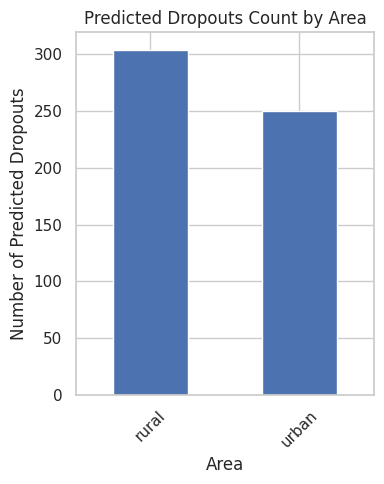

In [33]:
#Area-wise Using Random Forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('student_dropout_dataset.csv')

# Drop identifier and leakage-prone columns
df_clean = df.drop(['Student_ID', 'Student_name', 'DropoutReason', 'dropout_score'], axis=1, errors='ignore')

# Encode categorical columns
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Define features and target
target = 'dropout'
X = df_clean.drop(target, axis=1)
y = df_clean[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on full data
y_pred = rf.predict(X)

# Add predictions to original dataframe
result_df = df.copy()
result_df['predicted_dropout'] = y_pred

# Group predicted dropouts by Area
area_dropout_counts = result_df[result_df['predicted_dropout'] == 1].groupby('Area').size().sort_values(ascending=False)

# Print area-wise dropout counts
print("Predicted dropouts count by area:")
print(area_dropout_counts)

# Plot the counts
plt.figure(figsize=(4,5))
area_dropout_counts.plot(kind='bar')
plt.title('Predicted Dropouts Count by Area')
plt.xlabel('Area')
plt.ylabel('Number of Predicted Dropouts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dropout Reasons Count:
DropoutReason
Lack of Interest    143
Early Marriage       95
Child Labour         89
Financial Issues     80
Household Work       74
Other                64
Migration            20
Health Issues         5
Name: count, dtype: int64


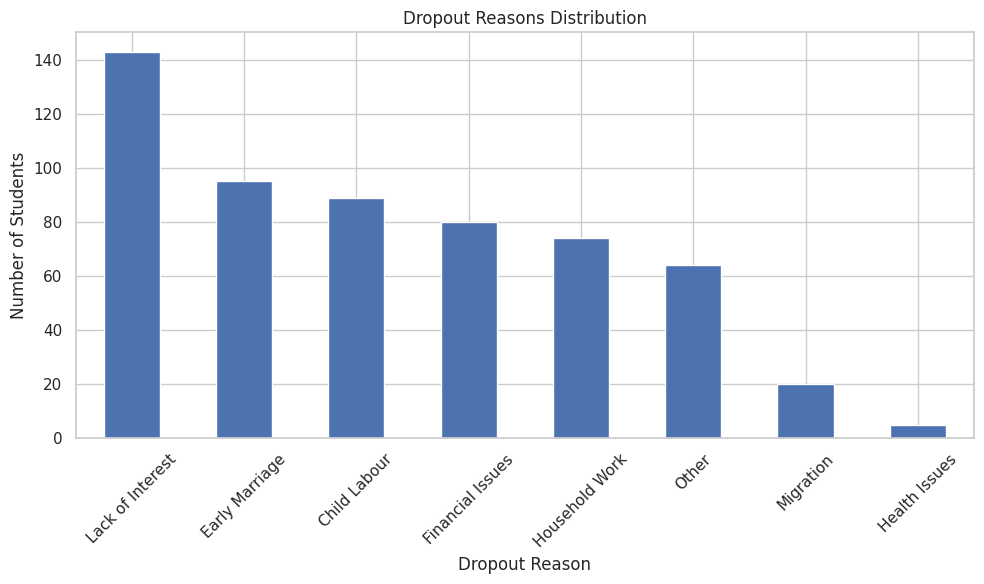

In [34]:
#Dropout Reasons using Random Forest
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('student_dropout_dataset.csv')

# Filter rows with dropout reason non-null and non-empty
dropout_reasons = df['DropoutReason'].dropna()
dropout_reasons = dropout_reasons[dropout_reasons.str.strip() != '']

# Count occurrences of each dropout reason
reason_counts = dropout_reasons.value_counts().sort_values(ascending=False)

# Print the counts
print("Dropout Reasons Count:")
print(reason_counts)

# Plot the counts
plt.figure(figsize=(10,6))
reason_counts.plot(kind='bar')
plt.title('Dropout Reasons Distribution')
plt.xlabel('Dropout Reason')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
